# Email/SMS Spam Classifier

**📖Introduction :**

>Email classifier is an ML-based approach to classifiying the Spam and Ham messages. It's an classification problem so,I tried all classifictaion Algorithm ,and finally on MultinomialNB algorithm is performed best in this dataset.

Dataset is taken from the [kaggle](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset).


**Dependencies :**

* Jupyter Notebook
* Python 3.10.0
* Scikit-Learn
* Tfidf Vectorizer
* nltk 3.7
* Pandas
* Numpy

Install dependencies using [conda](https://docs.conda.io/en/latest/)

**📝TODO :**

*    Pick the dataset from [kaggle](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)
*    Download the dataset from [kaggle](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)
*    **Preprocessing** the data
*    Build a **Model**
*    Save the Model as .pkl


**⚙️Setup --**

In [210]:
import numpy as np
import pandas as pd

 **🗂️Dataset import :**

In [211]:
df = pd.read_csv('spam.csv', encoding='latin1')  # import dataset
df.sample(5)   # random sample of 5 data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2114,spam,Sunshine Hols. To claim ur med holiday send a ...,NaN,NaN,NaN
2713,ham,Nope i'm not drivin... I neva develop da photo...,NaN,NaN,NaN
3407,spam,Do you want a New Nokia 3510i colour phone Del...,NaN,NaN,NaN
2962,ham,You dont know you jabo me abi.,NaN,NaN,NaN
5279,ham,"Helloooo... Wake up..! \Sweet\"" \""morning\"" \""...",NaN,NaN,NaN


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [213]:
# in unnamed 2,3,4 column almost all values are missing reove those three column
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True) 
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [214]:
# let's rename the column name for better understanding
df = df.rename(columns={'v1':'target','v2':'text'})
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [215]:
# label should be in numeric format so let me apply labelencoder to convert it in numeric
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [216]:
print(df.shape)
print(df.isnull().sum())
print(df.duplicated().sum())

(5572, 2)
target    0
text      0
dtype: int64
403


In [217]:
# in this dataset don't have any missing value but 403 rows are duplicate so, first remove those rows
df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)

In [218]:
print(df.duplicated().sum())

0


**📈Exploratory Data Analysis :-**

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

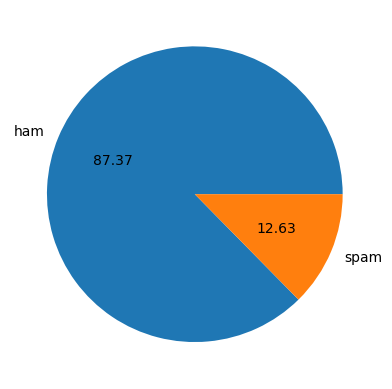

In [220]:
# pie plot of ham and spam msgs
plt.pie(df['target'].value_counts(),labels=('ham','spam'),autopct='%0.2f')
plt.show()

In [221]:
# from this pie chat clearly visisble it is an imbalance datset, spam data is very less.

In [222]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAFIKUL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [223]:
# let's calculate number of chercters present in per rows..
df['num_cheracters'] = df['text'].apply(len)
df.tail(5)

,target,text,num_cheracters
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125
5571,0,Rofl. Its true to its name,26


In [224]:
# now lets calculat number of words present in per words....
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,target,text,num_cheracters,num_words
5312,0,Here got ur favorite oyster... N got my favori...,121,25
5325,0,Gal n boy walking in d park. gal-can i hold ur...,160,43
3606,0,I have no idea where you are,28,7
3698,0,How i noe... Did Ì_ specify da domain as nusst...,69,17
3285,0,Not to worry. I'm sure you'll get it.,37,12


In [225]:
# now lets calculate the number of sentence per rows...
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))  # number of sentence per rows
df.sample(5)

,target,text,num_cheracters,num_words,num_sentences
186,0,"Haha awesome, be there in a minute",34,8,1
3706,0,Aight do you still want to get money,36,8,1
3945,0,How u doin baby girl ?? hope u are okay every ...,97,26,3
4622,0,U need my presnts always bcz U cant mis love. ...,172,33,3
2998,0,"Oh, then your phone phoned me but it disconnected",49,10,1


In [226]:
df[df['target']==0][['num_cheracters','num_words','num_sentences']]

,num_cheracters,num_words,num_sentences
0,111,24,2
1,29,8,2
3,49,13,1
4,61,15,1
6,77,18,2
...,...,...,...
5565,12,4,1
5568,37,9,1
5569,57,15,2
5570,125,27,1


In [227]:
df[df['target']==0][['num_cheracters','num_words','num_sentences']].describe()

,num_cheracters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [228]:
df[df['target']==1][['num_cheracters','num_words','num_sentences']]

,num_cheracters,num_words,num_sentences
2,155,37,2
5,148,39,4
8,158,32,5
9,154,31,3
11,136,31,3
...,...,...,...
5537,90,18,3
5540,160,38,6
5547,160,35,5
5566,147,30,1


In [229]:
df[df['target']==1][['num_cheracters','num_words','num_sentences']].describe()

,num_cheracters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_cheracters', ylabel='Count'>

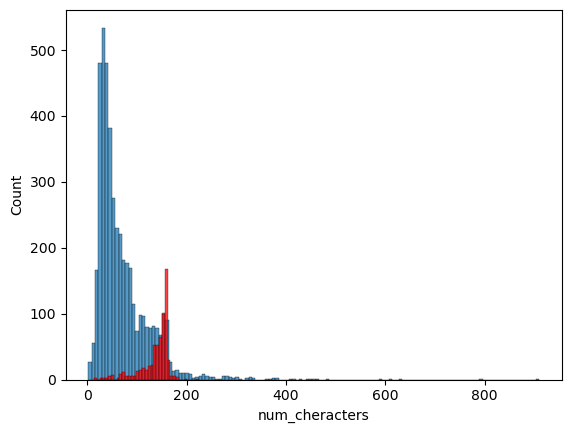

In [230]:
sns.histplot(df[df['target']==0]['num_cheracters'])
sns.histplot(df[df['target']==1]['num_cheracters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

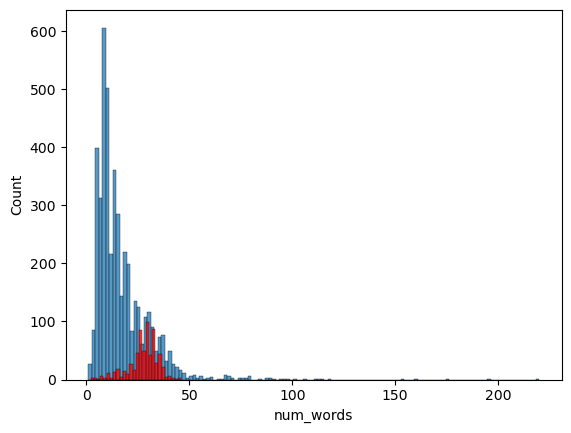

In [231]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

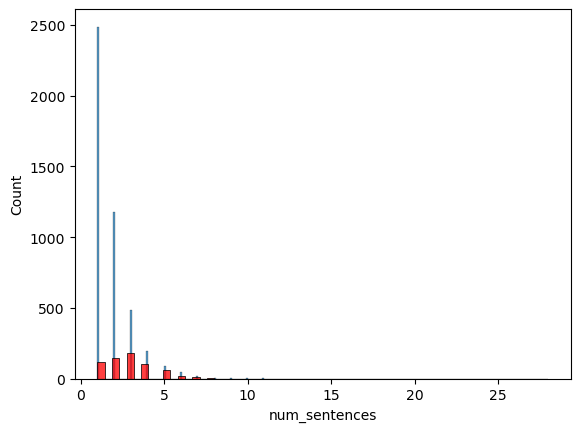

In [232]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

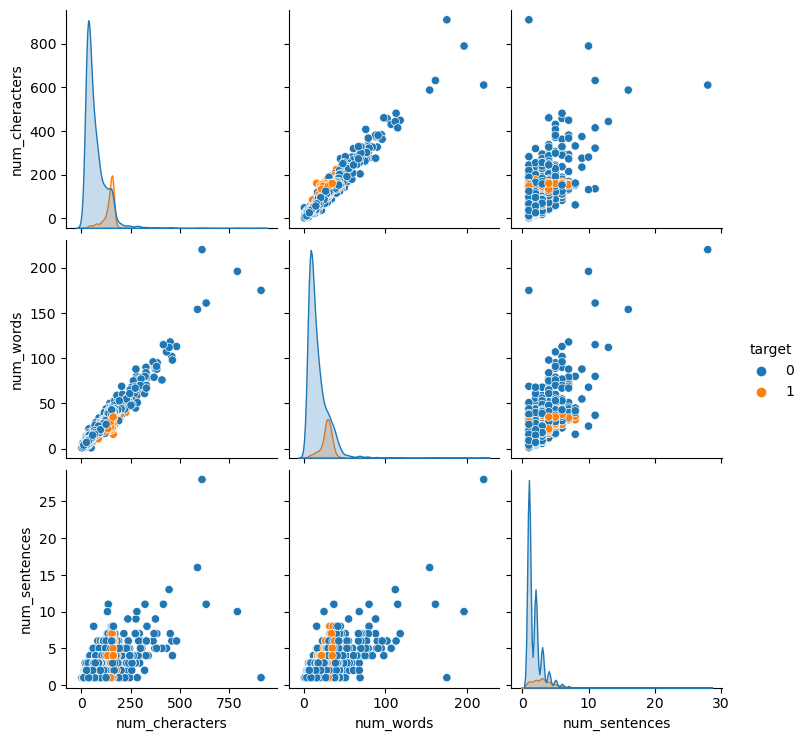

In [233]:
sns.pairplot(df,hue='target')

In [234]:
# lets check the correlation 
df.corr()

,target,num_cheracters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_cheracters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

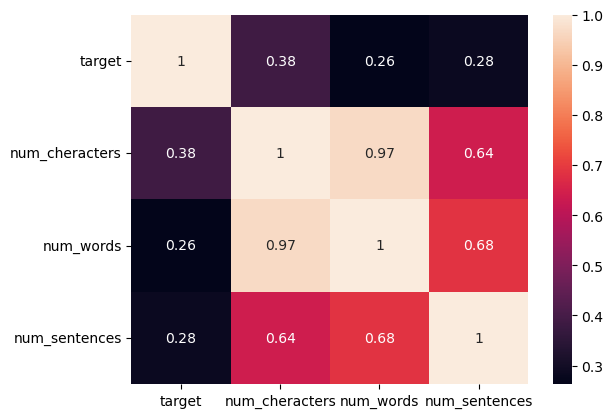

In [235]:
# plot correlation 
sns.heatmap(df.corr(),annot=True)

In [236]:
# note : In time of model building if i added one manually created columns the i will go for num_cheracters column
# bcz it's having a strong correlation rather than others two.

**Data Preprocessing :-**

- Lower case
- Tokenization
- Removing special characters
- Removing stopwords and puctuation
- Stemming

# Tokenization :
>Tokenization is basically splitting the sentences into words known as tokens. This is mainly one of the first steps to do when it comes to text classification.

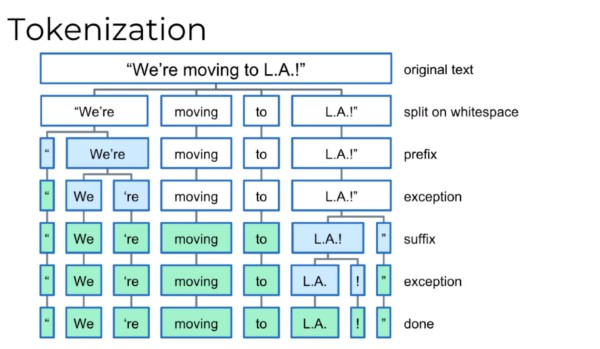



# Stemming :
>Stemming is a natural language processing technique that lowers inflection in words to their root forms, hence aiding in the preprocessing of text, words, and documents for text normalization.

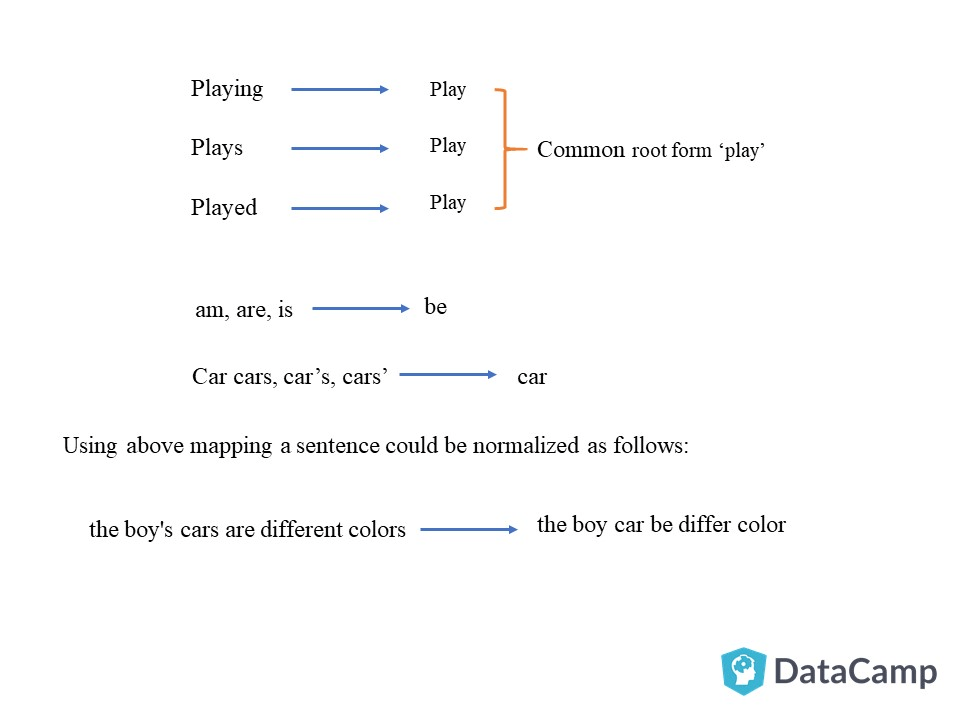

In [237]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [238]:
# let's define a function that will be do all the above operation at a time
def text_transform(text):
    text = text.lower()  # lower case of all letters
    text = nltk.word_tokenize(text)   # separate the words
    
    y = []
    for i in text:
        if i.isalnum():       
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:   # stopwords and punctuation remove
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))    # stem the all words 
        
    return " ".join(y)   # at last join all words in a string

In [239]:
text_transform(df['text'][133])  # test the function

'sunshin quiz wkli q win top soni dvd player u know countri algarv txt ansr sp tyron'

In [240]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [241]:
import string
string.punctuation   # punctuation list

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [242]:
from nltk.corpus import stopwords
stopwords.words('english') # stopwords list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [243]:
df['transformed_text'] = df['text'].apply(text_transform)
df.head(5)

,target,text,num_cheracters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [244]:
#!pip install wordcloud

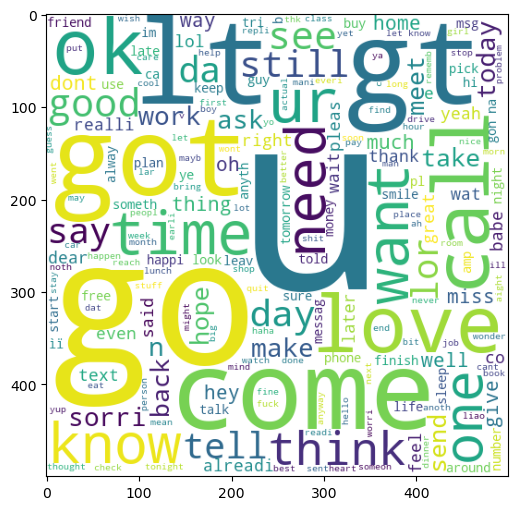

In [245]:
# ham msgs most frequent words
from wordcloud import WordCloud
plt.figure(figsize=(8,6))
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

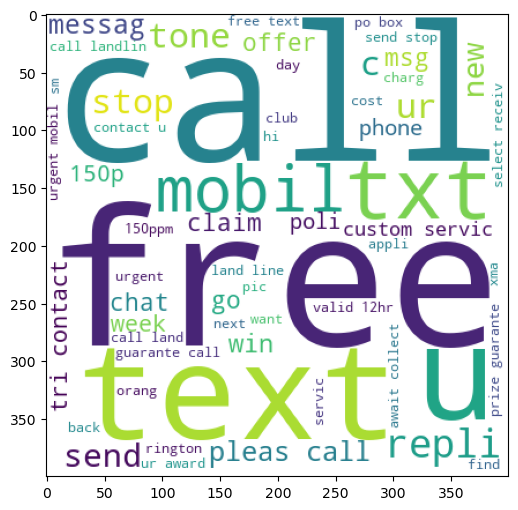

In [246]:
# spam msgs most frequent words
plt.figure(figsize=(8,6))
wc = WordCloud(width=400, height=400, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [247]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [248]:
len(spam_corpus)

9939

In [249]:
# most common 20 words in spam msgs
from collections import Counter
Counter(spam_corpus).most_common(20)
common_words_in_spam_msg = pd.DataFrame(Counter(spam_corpus).most_common(20))
common_words_in_spam_msg = common_words_in_spam_msg.rename(columns={0:'Words',1:'Counts'})
common_words_in_spam_msg

,Words,Counts
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\RAFIKUL\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


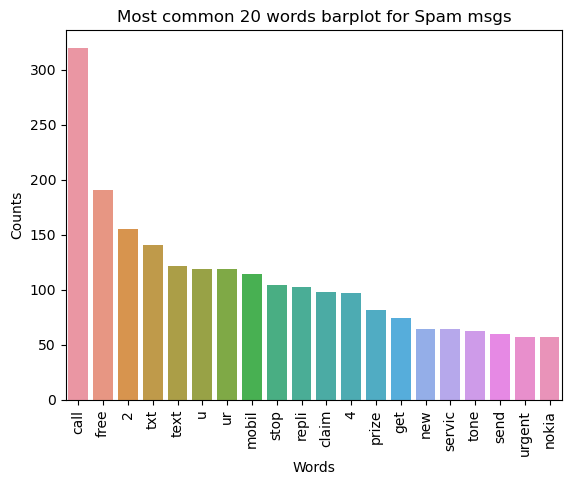

In [250]:
# barplot of frequent words
sns.barplot(common_words_in_spam_msg['Words'],common_words_in_spam_msg['Counts'])
plt.xticks(rotation=90)
plt.title('Most common 20 words barplot for Spam msgs')
plt.show()

In [251]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)
len(ham_corpus)

35394

In [252]:
from collections import Counter
Counter(ham_corpus).most_common(30)
# create a dataframe of ham_corpus
common_words_in_ham_msgs = pd.DataFrame(Counter(ham_corpus).most_common(30))
common_words_in_ham_msgs = common_words_in_ham_msgs.rename(columns={0:'Words',1:'Counts'})
common_words_in_ham_msgs

,Words,Counts
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\RAFIKUL\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


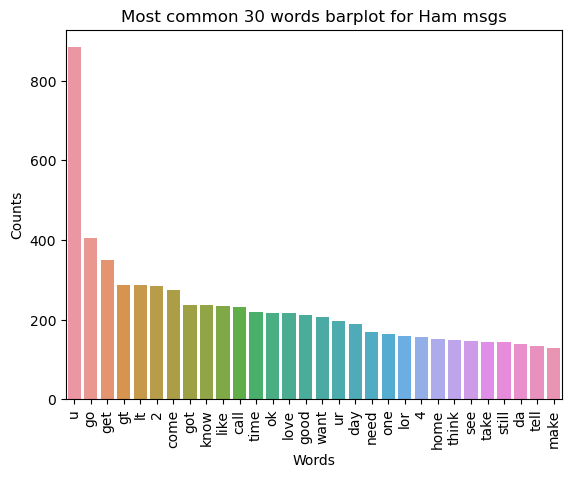

In [253]:
# plot this most common words in bar plot
sns.barplot(common_words_in_ham_msgs['Words'],common_words_in_ham_msgs['Counts'])
plt.xticks(rotation=90)
plt.title('Most common 30 words barplot for Ham msgs')
plt.show()

# Model Building

In [306]:
# text vectorization using BoW technique
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Tfidf Vectorizer
>TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction. For more information click [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

# Accuracy after using CountVectorizer 

>Accuracy score of the GaussianNB algorithm is  0.8684719535783365

>Confusion matrix of the GaussianNB algorithm is  [[772 117]
                                                 [ 19 126]]
                                                 
>Precision score of the GaussianNB algorithm is  0.5185185185185185

---
>Accuracy score of the MultinomialNB algorithm is  0.9738878143133463

>Confusion matrix of the MultinomialNB algorithm is  [[872  17]
 [ 10 135]]
 
>Precision score of the MultinomialNB algorithm is  0.8881578947368421

---
>Accuracy score of the BernoulliNB algorithm is  0.9661508704061895

>Confusion matrix of the BernoulliNB algorithm is  [[885   4]
 [ 31 114]]
 
>Precision score of the BernoulliNB algorithm is  0.9661016949152542

---
# Accuracy after using TfidfVectorizer

>Accuracy score of the GaussianNB algorithm is  0.8636363636363636

>Confusion matrix of the GaussianNB algorithm is  [[772 117]
 [ 24 121]]
 
>Precision score of the GaussianNB algorithm is  0.5084033613445378

---
>Accuracy score of the MultinomialNB algorithm is  0.9613152804642167

>Confusion matrix of the MultinomialNB algorithm is  [[888   1]
 [ 39 106]]
 
>Precision score of the MultinomialNB algorithm is  0.9906542056074766

---
>Accuracy score of the BernoulliNB algorithm is  0.9661508704061895

>Confusion matrix of the BernoulliNB algorithm is  [[885   4]
 [ 31 114]]
 
>Precision score of the BernoulliNB algorithm is  0.9661016949152542

In [307]:
x = tfidf.fit_transform(df['transformed_text']).toarray()
x.shape

(5169, 3000)

In [308]:
# MinMaxScaler 
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [309]:
y = df['target'].values
y.shape

(5169,)

In [310]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Shape of x_train',x_train.shape)
print('Shape of x_test',x_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of x_train (4135, 3000)
Shape of x_test (1034, 3000)
Shape of y_train (4135,)
Shape of y_test (1034,)


In [311]:
from sklearn.naive_bayes import *

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [312]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [313]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print('Accuracy score of the GaussianNB algorithm is ',accuracy_score(y_test,y_pred1))
print('Confusion matrix of the GaussianNB algorithm is ',confusion_matrix(y_test,y_pred1))
print('Precision score of the GaussianNB algorithm is ',precision_score(y_test,y_pred1))

Accuracy score of the GaussianNB algorithm is  0.8607350096711799
Confusion matrix of the GaussianNB algorithm is  [[769 120]
 [ 24 121]]
Precision score of the GaussianNB algorithm is  0.5020746887966805


In [314]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print('Accuracy score of the MultinomialNB algorithm is ',accuracy_score(y_test,y_pred2))
print('Confusion matrix of the MultinomialNB algorithm is ',confusion_matrix(y_test,y_pred2))
print('Precision score of the MultinomialNB algorithm is ',precision_score(y_test,y_pred2))

Accuracy score of the MultinomialNB algorithm is  0.9729206963249516
Confusion matrix of the MultinomialNB algorithm is  [[888   1]
 [ 27 118]]
Precision score of the MultinomialNB algorithm is  0.9915966386554622


In [315]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print('Accuracy score of the BernoulliNB algorithm is ',accuracy_score(y_test,y_pred3))
print('Confusion matrix of the BernoulliNB algorithm is ',confusion_matrix(y_test,y_pred3))
print('Precision score of the BernoulliNB algorithm is ',precision_score(y_test,y_pred3))

Accuracy score of the BernoulliNB algorithm is  0.9729206963249516
Confusion matrix of the BernoulliNB algorithm is  [[884   5]
 [ 23 122]]
Precision score of the BernoulliNB algorithm is  0.9606299212598425


In [282]:
#!pip install xgboost

In [298]:
# Let's explore more algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [299]:
lrc = LogisticRegression()
svc = SVC()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
xgc = XGBClassifier()

In [300]:
clfs = {
    'LR' : lrc,
    'SVC' : svc,
    'NB' : mnb,
    'DT' : dtc,
    'KN' : knc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbc,
    'xgb' : xgc
}

In [301]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [304]:
train_classifier(etc, x_train,y_train,x_test,y_test)

(0.9738878143133463, 0.9758064516129032)

In [316]:
etc.fit(x_train,y_train)
y_predicted  = etc.predict(x_test)
print('Accuracy - ',accuracy_score(y_test,y_predicted))
print('Confusion matrix - ',confusion_matrix(y_test,y_predicted))
print('Precision_score - ',precision_score(y_test,y_predicted))

Accuracy -  0.97678916827853
Confusion matrix -  [[885   4]
 [ 20 125]]
Precision_score -  0.9689922480620154


In [317]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  0.9584139264990329
Precision -  0.9473684210526315
For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9917355371900827
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
For  DT
Accuracy -  0.9545454545454546
Precision -  0.8402777777777778
For  KN
Accuracy -  0.9100580270793037
Precision -  1.0
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
For  AdaBoost
Accuracy -  0.9506769825918762
Precision -  0.8671875
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8571428571428571
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9763779527559056
For  GBDT
Accuracy -  0.9632495164410058
Precision -  0.9652173913043478
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.924812030075188


In [88]:
# accuracy and precision score with max_features
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
4,KN,0.896518,1.000000
8,ETC,0.976789,0.991870
1,SVC,0.968085,0.991228
5,RF,0.967118,0.991150
2,NB,0.961315,0.990654
9,GBDT,0.962282,0.956897
0,LR,0.948743,0.942308
10,xgb,0.968085,0.917910
7,BgC,0.958414,0.904762
6,AdaBoost,0.947776,0.842105


# Model Improve

In [139]:
# Model improve
# 1. change the max_features parameters to 1000 of Tfidf 
test_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_1000':accuracy_scores,
                        'Precision_max_ft_1000':precision_scores}).sort_values('Precision_max_ft_1000',ascending=False)
test_df1 = performance_df.merge(test_df1,on='Algorithm')
test_df1

,Algorithm,Accuracy,Precision,Accuracy_max_ft_1000,Precision_max_ft_1000
0,KN,0.896518,1.000000,0.922631,0.985075
1,ETC,0.976789,0.991870,0.975822,0.941176
2,SVC,0.968085,0.991228,0.977756,0.984127
3,RF,0.967118,0.991150,0.973888,0.983607
4,NB,0.961315,0.990654,0.973888,0.968254
5,GBDT,0.962282,0.956897,0.962282,0.949153
6,LR,0.948743,0.942308,0.966151,0.950820
7,xgb,0.968085,0.917910,0.970986,0.952756
8,BgC,0.958414,0.904762,0.960348,0.871429
9,AdaBoost,0.947776,0.842105,0.953578,0.870229


In [156]:
# change the max_features parameters to 2000 of Tfidf 
test_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_2000':accuracy_scores,
                        'Precision_max_ft_2000':precision_scores}).sort_values('Precision_max_ft_2000',ascending=False)
test_df2 = test_df1.merge(test_df2,on='Algorithm')
test_df2

,Algorithm,Accuracy,Precision,Accuracy_max_ft_1000,Precision_max_ft_1000,Accuracy_max_ft_2000,Precision_max_ft_2000
0,KN,0.896518,1.000000,0.922631,0.985075,0.913926,1.000000
1,ETC,0.976789,0.991870,0.975822,0.941176,0.983559,0.984848
2,SVC,0.968085,0.991228,0.977756,0.984127,0.975822,0.983871
3,RF,0.967118,0.991150,0.973888,0.983607,0.973888,0.991667
4,NB,0.961315,0.990654,0.973888,0.968254,0.975822,0.983871
5,GBDT,0.962282,0.956897,0.962282,0.949153,0.962282,0.956897
6,LR,0.948743,0.942308,0.966151,0.950820,0.961315,0.948718
7,xgb,0.968085,0.917910,0.970986,0.952756,0.970986,0.932331
8,BgC,0.958414,0.904762,0.960348,0.871429,0.962282,0.889706
9,AdaBoost,0.947776,0.842105,0.953578,0.870229,0.952611,0.858209


In [173]:
# change the max_features parameters to 2000 of Tfidf 
test_df3 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,
                        'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
test_df3 = test_df2.merge(test_df3,on='Algorithm')
test_df3

,Algorithm,Accuracy,Precision,Accuracy_max_ft_1000,Precision_max_ft_1000,Accuracy_max_ft_2000,Precision_max_ft_2000,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.896518,1.000000,0.922631,0.985075,0.913926,1.000000,0.910058,1.000000
1,ETC,0.976789,0.991870,0.975822,0.941176,0.983559,0.984848,0.974855,0.954198
2,SVC,0.968085,0.991228,0.977756,0.984127,0.975822,0.983871,0.974855,0.991736
3,RF,0.967118,0.991150,0.973888,0.983607,0.973888,0.991667,0.973888,0.991667
4,NB,0.961315,0.990654,0.973888,0.968254,0.975822,0.983871,0.972921,0.991597
5,GBDT,0.962282,0.956897,0.962282,0.949153,0.962282,0.956897,0.962282,0.956897
6,LR,0.948743,0.942308,0.966151,0.950820,0.961315,0.948718,0.958414,0.947368
7,xgb,0.968085,0.917910,0.970986,0.952756,0.970986,0.932331,0.969052,0.924812
8,BgC,0.958414,0.904762,0.960348,0.871429,0.962282,0.889706,0.963250,0.874126
9,AdaBoost,0.947776,0.842105,0.953578,0.870229,0.952611,0.858209,0.950677,0.867188


In [191]:
# after apply minmaxscaler function
test_df4 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_Scaling':accuracy_scores,
                        'Precision_Scaling':precision_scores}).sort_values('Precision_Scaling',ascending=False)
test_df4 = test_df3.merge(test_df4,on='Algorithm')
test_df4

,Algorithm,Accuracy,Precision,Accuracy_max_ft_1000,Precision_max_ft_1000,Accuracy_max_ft_2000,Precision_max_ft_2000,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_Scaling,Precision_Scaling
0,KN,0.896518,1.000000,0.922631,0.985075,0.913926,1.000000,0.910058,1.000000,0.889749,1.000000
1,ETC,0.976789,0.991870,0.975822,0.941176,0.983559,0.984848,0.974855,0.954198,0.977756,1.000000
2,SVC,0.968085,0.991228,0.977756,0.984127,0.975822,0.983871,0.974855,0.991736,0.969052,0.966942
3,RF,0.967118,0.991150,0.973888,0.983607,0.973888,0.991667,0.973888,0.991667,0.969052,0.991304
4,NB,0.961315,0.990654,0.973888,0.968254,0.975822,0.983871,0.972921,0.991597,0.977756,0.923611
5,GBDT,0.962282,0.956897,0.962282,0.949153,0.962282,0.956897,0.962282,0.956897,0.963250,0.965217
6,LR,0.948743,0.942308,0.966151,0.950820,0.961315,0.948718,0.958414,0.947368,0.968085,0.991228
7,xgb,0.968085,0.917910,0.970986,0.952756,0.970986,0.932331,0.969052,0.924812,0.968085,0.917910
8,BgC,0.958414,0.904762,0.960348,0.871429,0.962282,0.889706,0.963250,0.874126,0.960348,0.888060
9,AdaBoost,0.947776,0.842105,0.953578,0.870229,0.952611,0.858209,0.950677,0.867188,0.947776,0.842105


After check different algorithm , MinMaxScaler, and max features of tfidf I came an conclusion that MultinomialNB algorithm performing good in precision score and accuracy as well as, here precision score is imporatnt beacuse dataset is imbalance. So, after consider all the factors I decide to use MultinomialNB algorithm for the further process.

# **Save Model**
>By using pickle library saved the model in .pkl format so, i can load this .pkl file again in vs code to use it in Web Application  

In [319]:
import pickle
pickle.dump(mnb,open('model.pkl','wb'))
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(text_transform,open('text_transform.pkl','wb'))